**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [63]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [64]:
anger_train.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [65]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [66]:
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [67]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [68]:
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [69]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [70]:
train_df.head()

,id,text,emotion,intensity
214,10214,"People need a way to escape,escape what?This c...",anger,0.604
1400,20543,That last minute was like watching a horror sh...,fear,0.500
696,10696,@LonelyGoomba I wouldn't bring this up if I we...,anger,0.328
15,10015,Zero help from @ups customer service. Just pus...,anger,0.854
186,10186,@RonMexico760 The guy who calls people 'cuck' ...,anger,0.625


In [71]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


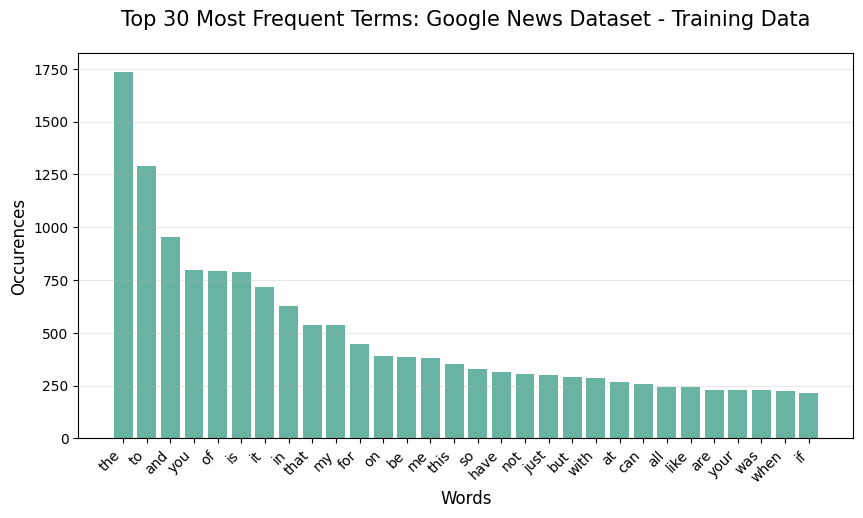

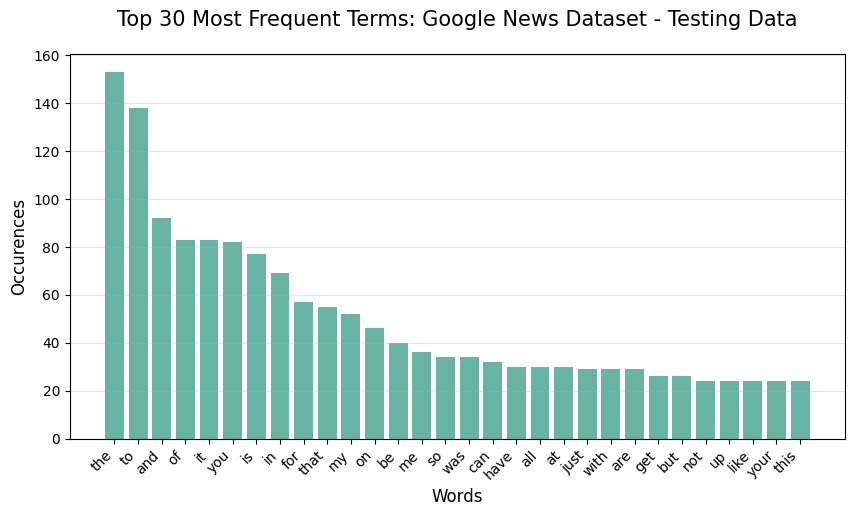

In [72]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#training data vectorizer
vectorizer_train = CountVectorizer()
x_train_counts = vectorizer_train.fit_transform(train_df['text'])

train_frequency = pd.DataFrame({
    'term':vectorizer_train.get_feature_names_out(),
    'occurrences':np.asarray(x_train_counts.sum(axis=0)).ravel().tolist()
    })
train_frequency = train_frequency.sort_values('occurrences', ascending=False)
train_top_30 = train_frequency.head(30)

#train grpah
plt.figure(figsize=(10,5))
x_pos = np.arange(len(train_top_30))
plt.bar(x_pos, train_top_30['occurrences'], color='#69b3a2')
plt.xticks(x_pos, train_top_30['term'], rotation=45, ha='right')
plt.ylabel('Occurences', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.title('Top 30 Most Frequent Terms: Google News Dataset - Training Data', fontsize=15, pad=20)
plt.grid(axis='y', alpha=0.3)
plt.show()

#testing data vectorizer (basically copied the code above and changed training data to testing)
vectorizer_test = CountVectorizer()
x_test_counts = vectorizer_test.fit_transform(test_df['text'])

test_frequency = pd.DataFrame({
    'term':vectorizer_test.get_feature_names_out(),
    'occurrences':np.asarray(x_test_counts.sum(axis=0)).ravel().tolist()
    })
test_frequency = test_frequency.sort_values('occurrences', ascending=False)
test_top_30 = test_frequency.head(30)

#testing grpah
plt.figure(figsize=(10,5))
x_pos = np.arange(len(test_top_30))
plt.bar(x_pos, test_top_30['occurrences'], color='#69b3a2')
plt.xticks(x_pos, test_top_30['term'], rotation=45, ha='right')
plt.ylabel('Occurences', fontsize=12)
plt.xlabel('Words', fontsize=12)
plt.title('Top 30 Most Frequent Terms: Google News Dataset - Testing Data', fontsize=15, pad=20)
plt.grid(axis='y', alpha=0.3)
plt.show()


The most frequent words are full of function words

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [73]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [74]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [75]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

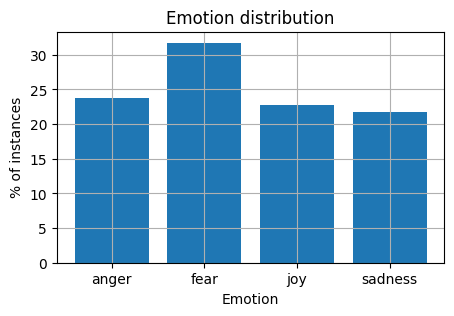

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [79]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [80]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [81]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [82]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [83]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [84]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [85]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [86]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [87]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [89]:
"😂" in feature_names_500

True

In [90]:
"happy mother" in feature_names_500

False

In [91]:
"love" in feature_names_500
"happy" in feature_names_500
"lost" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [92]:
# Answer here
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# Basically the same as that ntlk library [24], but with TfidVectorizer and 1000 features

from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features = TFIDF_1000.transform(train_df['text'])

feature_names_TFIDF = TFIDF_1000.get_feature_names_out()
feature_names_TFIDF[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [94]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'fear', 'anger', 'sadness', 'joy', 'joy',
       'anger', 'joy', 'sadness'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [95]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [96]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [97]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [98]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

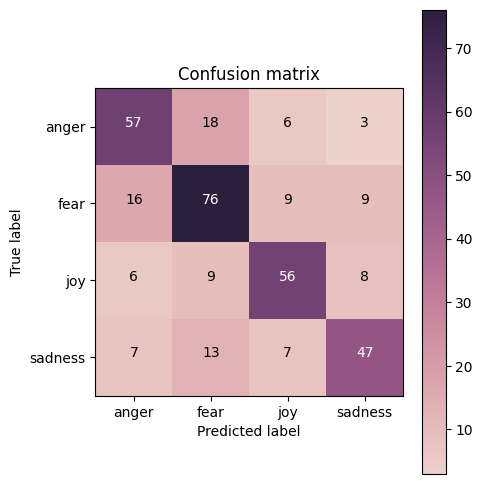

In [99]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [100]:
# Answer here
"""
WHAT YOU CAN SEE ON THE CONFUSION MATRIX

Accurate results: anger 57%, fear 76%, joy 56%, sadness 47%
The worst predictions:  true was anger -> model predicetd as fear 18%
                        true was fear -> model predicted as anger 16%
                        true was joy -> model predicted as fear 9% (😂 funny)
                        true was sadness -> model prediced as fear 13%

WHAT THE RESULTS MEAN
Most often, the model is confused by anger and fear. In both mistaken predictions (with combination anger-fear/fear-anger) there is similar % score (18 and 16).
The model has the worst results in recognising sadness (only 47% of accuracy).
The easies for the model is to recognise fear (76%).
The less mistakes the model have with anger and sadness (3%).

WHAT INSIGHT CAN YOU GET FROM THE CONFUSION MATRIX
That the model could be better. Maybe more features would help. The only usefull result is with fear. It needs more opitmization with anger, joy, and sadness.

"""

'\nWHAT YOU CAN SEE ON THE CONFUSION MATRIX\n\nAccurate results: anger 57%, fear 76%, joy 56%, sadness 47%\nThe worst predictions:  true was anger -> model predicetd as fear 18%\n                        true was fear -> model predicted as anger 16%\n                        true was joy -> model predicted as fear 9% (😂 funny)\n                        true was sadness -> model prediced as fear 13%\n\nWHAT THE RESULTS MEAN\nMost often, the model is confused by anger and fear. In both mistaken predictions (with combination anger-fear/fear-anger) there is similar % score (18 and 16).\nThe model has the worst results in recognising sadness (only 47% of accuracy).\nThe easies for the model is to recognise fear (76%).\nThe less mistakes the model have with anger and sadness (3%).\n\nWHAT INSIGHT CAN YOU GET FROM THE CONFUSION MATRIX\nThat the model could be better. Maybe more features would help. The only usefull result is with fear. It needs more opitmization with anger, joy, and sadness.\n\n

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

ACCURACY
training accuracy: 0.79
testing accuracy: 0.7

CLASSIFICATION
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

CONFUSION MATRIX
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


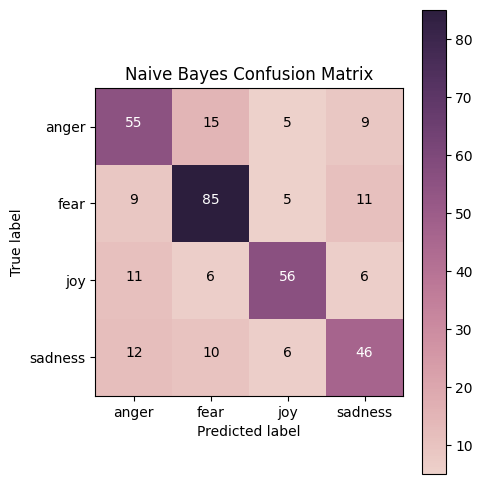

In [101]:
# Answer here
#model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

#data blok has the same format as from the decision tree
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

#model
NB_model = MultinomialNB()

#training
NB_model.fit(X_train, y_train)

#predict
y_train_pred_NB =NB_model.predict(X_train)
y_test_pred_NB = NB_model.predict(X_test)

###################### results ###########################
#accuracy

acc_train_NB = accuracy_score(y_true=y_train, y_pred=y_train_pred_NB)
acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('ACCURACY')
print('training accuracy: {}'.format(round(acc_train_NB, 2)))
print('testing accuracy: {}\n'.format(round(acc_test_NB, 2)))

#precision, recall, f1-score
print('CLASSIFICATION')
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

# check by confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB) 
print('CONFUSION MATRIX')
print(cm)

# Funciton for visualizing confusion_matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):

    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Naive Bayes Confusion Matrix')



---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [102]:
# Answer here
"""
TRAINING ACCURACY
NB is more stable model (9% gap), DT (31%) overfitting

F1 Score
NB is better with fear and joy. DT is beeter in anger and sadness.

WHAT YOU CAN SEE ON THE CONFUSION MATRIX

Accurate results: anger 55% (worse than DT - 1%), fear 85% (better than DT - 8%), joy 56% (same as DT), sadness 46% (worse 1%)
The worst predictions:  true was anger -> model predicetd as fear 15% (same worst outcome)
                        true was fear -> model predicted as sadness 11% (DT:anger)
                        true was joy -> model predicted as anger 11% (DT:fear) <- not so funny anymore
                        true was sadness -> model prediced as anger 12%

WHAT THE RESULTS MEAN
Most often, the model is confused by anger and fear, which is the same result as DT. 
The model has the worst results in recognising sadness (only 46% of accuracy), which is the same result as DT.
The easies for the model is to recognise fear (85%). Intristingly NB is more accurate than DT.

WHAT INSIGHT CAN YOU GET FROM THE CONFUSION MATRIX
NB have overall better results, but only with anger, which was sufficient in DT. Is still isn't accepltable for saddnes, joy, and fear. Both models have the biggest problem with sadness.

NB is slightly better.

#################################
How different the models are?
DT - greedy alogirthm, can create complex trees
- here we could se ofverfittin
- basically it created cverly complex rules to memorize training examples rather than to lear generalized patterns.

NB - probability based on bayes
- simpler probability model that was more imune to noise data -> avoided overfitting  

"""


"\nTRAINING ACCURACY\nNB is more stable model (9% gap), DT (31%) overfitting\n\nF1 Score\nNB is better with fear and joy. DT is beeter in anger and sadness.\n\nWHAT YOU CAN SEE ON THE CONFUSION MATRIX\n\nAccurate results: anger 55% (worse than DT - 1%), fear 85% (better than DT - 8%), joy 56% (same as DT), sadness 46% (worse 1%)\nThe worst predictions:  true was anger -> model predicetd as fear 15% (same worst outcome)\n                        true was fear -> model predicted as sadness 11% (DT:anger)\n                        true was joy -> model predicted as anger 11% (DT:fear) <- not so funny anymore\n                        true was sadness -> model prediced as anger 12%\n\nWHAT THE RESULTS MEAN\nMost often, the model is confused by anger and fear, which is the same result as DT. \nThe model has the worst results in recognising sadness (only 46% of accuracy), which is the same result as DT.\nThe easies for the model is to recognise fear (85%). Intristingly NB is more accurate than 

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [103]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [104]:
import keras

In [105]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [106]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 214     anger
1400     fear
696     anger
15      anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [107]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [108]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [109]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [110]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3786 - loss: 1.3235 - val_accuracy: 0.4582 - val_loss: 1.2722
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6502 - loss: 0.9728 - val_accuracy: 0.6398 - val_loss: 0.9454
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7960 - loss: 0.5807 - val_accuracy: 0.6859 - val_loss: 0.8173
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8492 - loss: 0.4109 - val_accuracy: 0.7061 - val_loss: 0.7979
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8846 - loss: 0.3299 - val_accuracy: 0.6888 - val_loss: 0.8521
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9098 - loss: 0.2588 - val_accuracy: 0.6830 - val_loss: 0.8816
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9267 - loss: 0.2183 - val_accuracy: 0.6744 - val_loss: 0.9152
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9435 - loss: 0.1759 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [111]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[6.32570358e-04, 9.98234987e-01, 1.99880942e-05, 1.11242523e-03],
       [1.55527334e-04, 4.76963213e-03, 6.80563971e-07, 9.95074093e-01],
       [2.22404178e-11, 1.00000000e+00, 2.50786492e-11, 2.39001680e-10],
       [6.19252264e-01, 6.75049052e-03, 1.98952779e-02, 3.54101986e-01],
       [6.70780316e-02, 8.47593299e-04, 1.19483484e-04, 9.31954920e-01]],
      dtype=float32)

In [112]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'sadness', 'fear', 'anger', 'sadness'], dtype=object)

In [113]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [114]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.378633,1.323472,0.458213,1.272192
1,1,0.650152,0.972774,0.639769,0.945417
2,2,0.796014,0.580663,0.685879,0.817347
3,3,0.849156,0.410948,0.706052,0.797881
4,4,0.884583,0.329939,0.688761,0.852149
5,5,0.909770,0.258800,0.682997,0.881588
6,6,0.926654,0.218293,0.674352,0.915205
7,7,0.943537,0.175921,0.680115,1.004869
8,8,0.953778,0.158224,0.671470,1.048424
9,9,0.961251,0.134730,0.671470,1.114637


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


<function matplotlib.pyplot.show(close=None, block=None)>

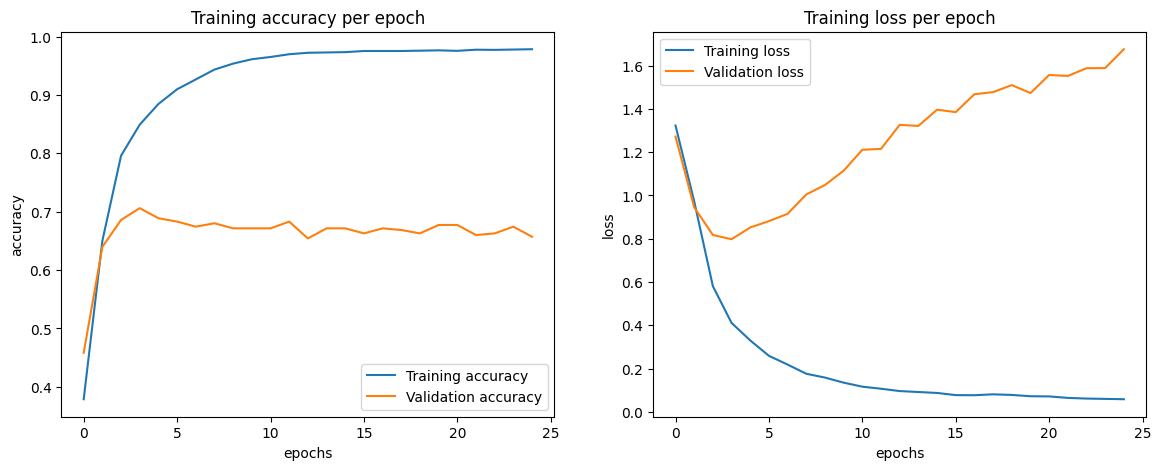

In [115]:
# Answer here
import matplotlib.pyplot as plt

#data are saved in training_log
#thanks to the table above, I can actually see whats in training_log, it's less abstract and way better to work with (epoch, accuracy, loss,..)

#creating those two graph
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14, 5))

#1. trainign accuracy, vylidation accuracy
ax1.plot(training_log['epoch'], training_log['accuracy'], label='Training accuracy')
ax1.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation accuracy')

ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.set_title('Training accuracy per epoch')
ax1.legend()

#2. training loss, validation accuracy
ax2.plot(training_log['epoch'], training_log['loss'], label='Training loss')
ax2.plot(training_log['epoch'], training_log['val_loss'], label='Validation loss')

ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.set_title('Training loss per epoch')
ax2.legend()

plt.show

In [116]:
"""
How to interpret the graphs you got?
How are they related to the concept of overfitting/underfitting covered in class?

There is a big difference between training accuracy and validation accuracy in the left plot.
Training accuracy is very close to 1, which means it is learning, but it is low on validation, which means the model isn't succesfull on the data it didn't see before.
The model is very sucefull with training data and is not sucefull vit validation data -> that means he is very good with the data he already knows,
but does not have any general rule for the new data.
With every epoch, the model is better at training data, but is not able to accuretly predict the validation data.

The model reaches the best performance around epoch 3, after that, the model staps improving on validation data, there is big increase in validation loss.
We can see that with the blue line (training loss) the model is increasing the performance on training data.
Thus could mean the model is specialised in training data and has no general patterns for new data.
"""

"\nHow to interpret the graphs you got?\nHow are they related to the concept of overfitting/underfitting covered in class?\n\nThere is a big difference between training accuracy and validation accuracy in the left plot.\nTraining accuracy is very close to 1, which means it is learning, but it is low on validation, which means the model isn't succesfull on the data it didn't see before.\nThe model is very sucefull with training data and is not sucefull vit validation data -> that means he is very good with the data he already knows,\nbut does not have any general rule for the new data.\nWith every epoch, the model is better at training data, but is not able to accuretly predict the validation data.\n\nThe model reaches the best performance around epoch 3, after that, the model staps improving on validation data, there is big increase in validation loss.\nWe can see that with the blue line (training loss) the model is increasing the performance on training data.\nThus could mean the mode

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [117]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
214,10214,"People need a way to escape,escape what?This c...","[People, need, a, way, to, escape, ,, escape, ..."
1400,20543,That last minute was like watching a horror sh...,"[That, last, minute, was, like, watching, a, h..."
696,10696,@LonelyGoomba I wouldn't bring this up if I we...,"[@, LonelyGoomba, I, would, n't, bring, this, ..."
15,10015,Zero help from @ups customer service. Just pus...,"[Zero, help, from, @, ups, customer, service, ..."
186,10186,@RonMexico760 The guy who calls people 'cuck' ...,"[@, RonMexico760, The, guy, who, calls, people..."


In [118]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['People', 'need', 'a', 'way', 'to', 'escape', ',', 'escape', 'what', '?', 'This', 'corrupted', 'world.This', 'reality', '.', 'This', 'joke.This', 'fury', 'of', 'constant', 'pain', '&', 'amp', ';', 'stress.We', 'need', 'a', 'vacation']),
       list(['That', 'last', 'minute', 'was', 'like', 'watching', 'a', 'horror', 'show', '#', 'GBBO', '😥']),
       list(['@', 'LonelyGoomba', 'I', 'would', "n't", 'bring', 'this', 'up', 'if', 'I', 'were', 'you', '.', 'It', "'s", 'a', 'very', 'touchy', 'subject', '.', 'And', 'people', 'get', 'way', 'to', 'offended', 'these', 'days'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [119]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [120]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.36176798,  0.28129196, -0.09849543, -0.19975613, -0.01346316,
       -0.8189782 ,  0.72999245,  1.2093241 , -0.36918166, -0.12410949,
       -0.50040865, -0.92465085, -0.70197225,  0.50367945,  0.02555987,
       -0.5280476 ,  0.6383965 , -0.5105127 ,  0.25472435, -0.7424597 ,
        0.3537366 ,  0.6488825 ,  0.3173128 , -0.03669737,  0.42216247,
       -0.13212869, -0.7386246 ,  0.3176626 , -0.7292321 , -0.24169901,
        0.39154148,  0.02760268,  0.39126307, -0.92343414,  0.31674895,
        0.63561475,  0.36758894,  0.14021501, -0.66285324, -0.33948058,
        0.13409601, -0.16148841, -0.6234786 ,  0.2900603 ,  0.6767365 ,
       -0.3734774 , -0.7492032 ,  0.4376879 ,  0.62194747,  0.35702392,
        0.20188843, -1.1831374 ,  0.29388803,  0.14875948, -0.95914483,
       -0.10291199,  0.10848109,  0.07918849, -0.0217279 ,  0.53968793,
        0.53955936, -0.227534  ,  0.72832876,  0.05917211, -0.58217984,
        0.35140625,  0.3491146 ,  0.9266343 , -1.1642793 ,  1.10

In [121]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Makes', 0.9481390714645386),
 ('blessed', 0.9333624839782715),
 ('.\\nA', 0.9233084917068481),
 ('Be', 0.9097142219543457),
 ('PUSSY\\nP', 0.9056639671325684),
 ('cant', 0.9050992131233215),
 ('right', 0.9049510955810547),
 ("'be", 0.9027838706970215),
 ('help', 0.9020768404006958),
 ('abscess', 0.8985959887504578)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [61]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

#SORRY but I coudln't find the data source. Providede website sais:
#There was an error getting resource 'downloads':
#401: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object. Permission &#39;storage.objects.get&#39; denied on resource (or it may not exist).

FileNotFoundError: [Errno 2] No such file or directory: './GoogleNews/GoogleNews-vectors-negative300.bin'

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [122]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [123]:
glove_twitter_25_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('meets', 0.8841924071311951),
 ('prince', 0.832163393497467),
 ('queen', 0.8257461190223694),
 ('’s', 0.8174097537994385),
 ('crow', 0.813499391078949),
 ('hunter', 0.8131037950515747),
 ('father', 0.8115834593772888),
 ('soldier', 0.81113600730896),
 ('mercy', 0.8082392811775208),
 ('hero', 0.8082264065742493)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [124]:
# Answer here
# represen the sentence...
# My mum is happy
"""
my = 0.6782645862987623
mum = 0.0927042648929024
is = 0.092749267469287
happy = 0.26547289679286
These are all mde up vectors. I understad this task only as a representation how it could work.

(my + mum + is + happy) / 4 = 0.2822977538634529 <- this is a representation of the sentence based on arithmetic mean of individual words
"""

'\nmy = 0.6782645862987623\nmum = 0.0927042648929024\nis = 0.092749267469287\nhappy = 0.26547289679286\nThese are all mde up vectors. I understad this task only as a representation how it could work.\n\n(my + mum + is + happy) / 4 = 0.2822977538634529 <- this is a representation of the sentence based on arithmetic mean of individual words\n'

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [125]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [126]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [127]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [128]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [129]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss']
angry_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like']
data_words:  ['data', 'mobile', 'software', 'search', 'survey', 'web']
mining_words:  ['mining', 'offshore', 'manufacturing', 'pharma', 'agricultural', 'agriculture']

target words: 
['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'data', 'mobile', 'software', 'search', 'survey', 'web', 'mining', 'offshore', 'manufacturing', 'pharma', 'agricultural', 'agriculture']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

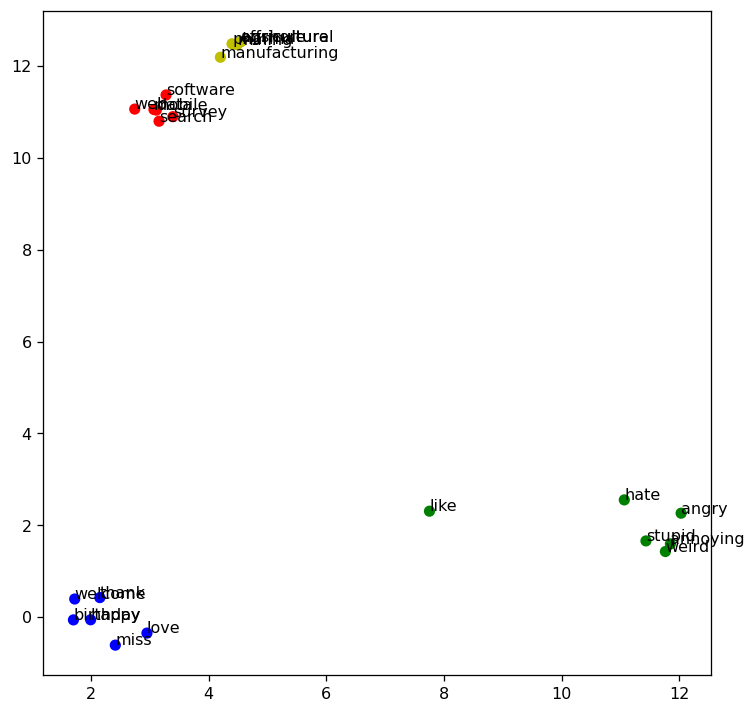

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## glove model
model = glove_twitter_25_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

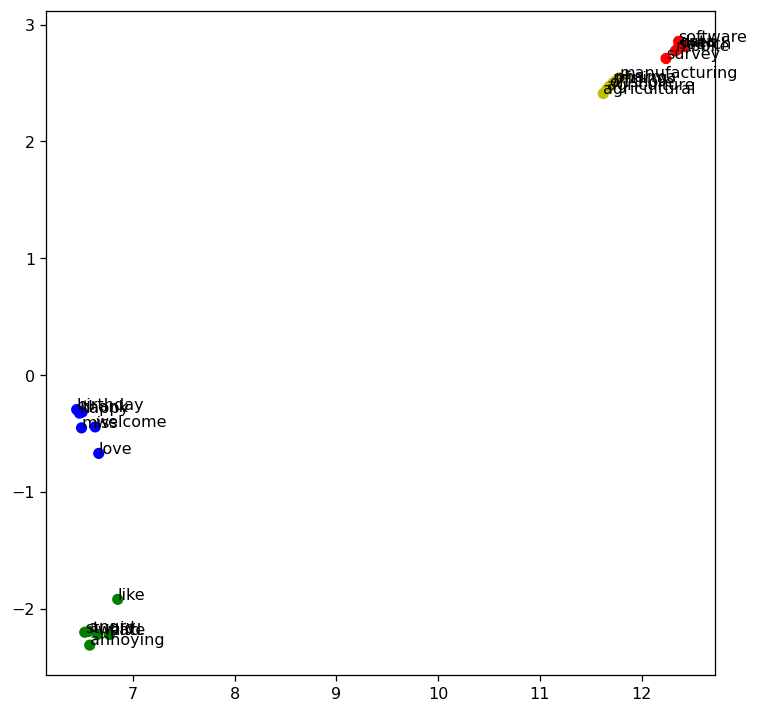

In [131]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## glove model
model = glove_twitter_25_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

happy_words:  ['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good']
angry_words:  ['angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously']
sad_words:  ['sad', 'swear', 'feel', 'same', 'wrong', 'meant', 'true', 'reason', 'remember', 'i', 'know', 'bad', 'thought', 'think', 'but']
fear_words:  ['fear', 'anger', 'enemy', 'afraid', 'destroy', 'fears', 'lies', 'faith', 'hatred', 'overcome', 'truth', 'promises', 'enemies', 'minds', 'suffer']

target words: 
['happy', 'birthday', 'thank', 'welcome', 'love', 'miss', 'hello', 'thanks', 'merry', 'bless', 'wish', 'day', 'dear', 'morning', 'good', 'angry', 'stupid', 'hate', 'annoying', 'weird', 'like', 'confused', 'fucking', 'people', 'dislike', 'awkward', 'reason', 'because', 'scary', 'seriously', 'sad', 'swear', 'feel', 'same', 'wrong', 'meant', 'true', 'reason', 'reme

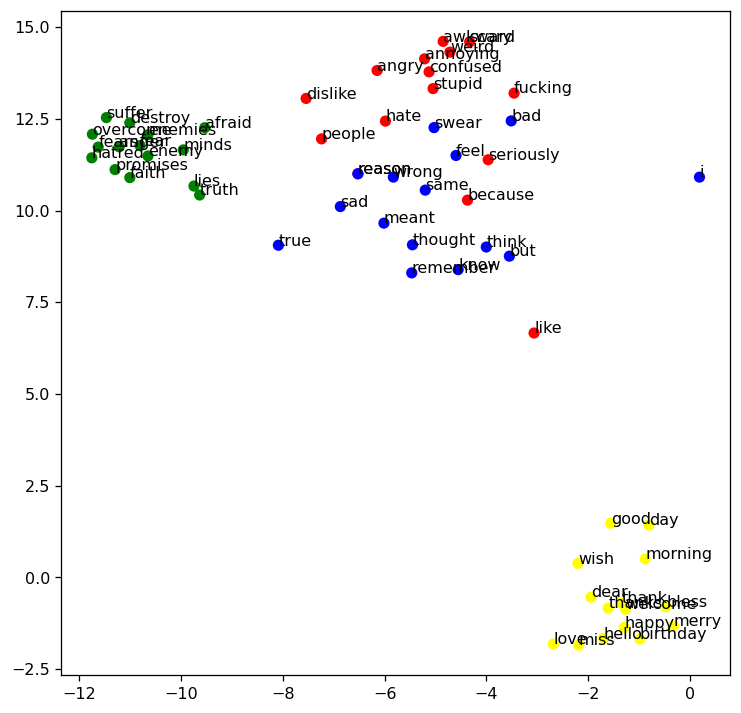

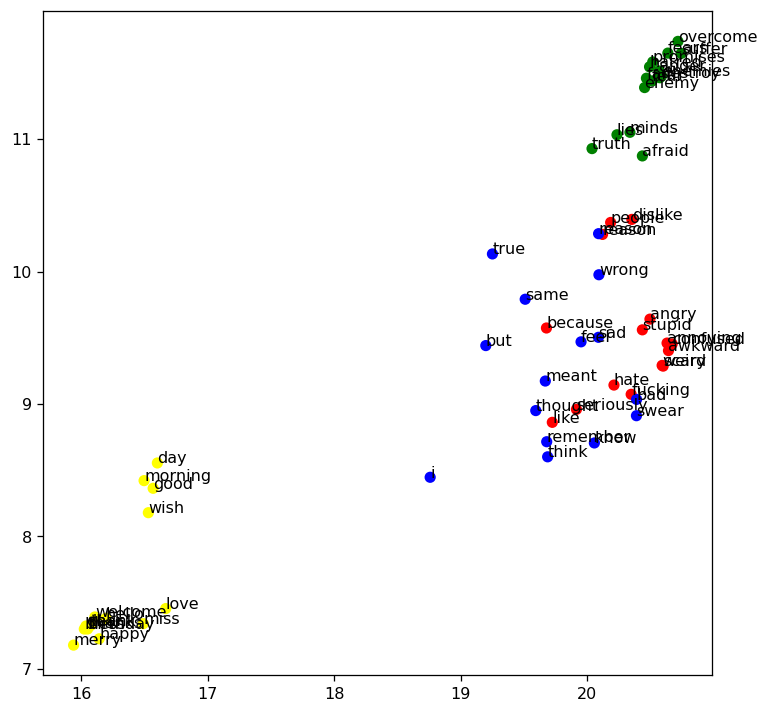

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# glove model
model = glove_twitter_25_model

#color per emotion
colors_map = ['yellow', 'red', 'blue', 'green']
color = []
for emotion in colors_map:
    color.extend([emotion] * 15)

#data list preparation
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in glove_twitter_25_model.most_similar('fear', topn=topn)]        

#I want to check them out 
print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

####################TSNE###############################

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

########################UMAP#########################

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


In [145]:
"""
With UMAP, I can see, that the individual wordS are very close to one another. For example grean for fear and yellow for happy.
With anger (red) and fear (blue), in both cases the custers overlap.
t-SNE makes better job with keeping happy (yellow) and anger (red) consistent. They are further away as individual words, but the cluster itself looks more united.

For semantic interpretation of those words, I would use t-SNE model, I can orient in this layout better.
"""

'\nWith UMAP, I can see, that the individual wordS are very close to one another. For example grean for fear and yellow for happy.\nWith anger (red) and fear (blue), in both cases the custers overlap.\nt-SNE makes better job with keeping happy (yellow) and anger (red) consistent. They are further away as individual words, but the cluster itself looks more united.\n\nFor semantic interpretation of those words, I would use t-SNE model, I can orient in this layout better.\n'

---